In [8]:
import numpy as np
import mylibrary.nnlib as tnn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import copy

In [9]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


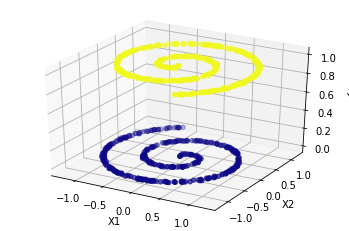

In [10]:
x1 = xx[:,0]
x2 = xx[:,1]

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Building Network

In [11]:
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, 2, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(2, 2, optimizer=optimizer)
layer3 = tnn.DoubleReluLinearLayer(2, 2, optimizer=optimizer)
layer4 = tnn.DoubleReluLinearLayer(2, 1, optimizer=optimizer)
sigmoid = tnn.Sigmoid()

In [12]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7199247965500939


100 Error =  0.6574330709308152


200 Error =  0.6478700586506665


300 Error =  0.6427449741790764


400 Error =  0.6422542650491667


500 Error =  0.6422342814136683


600 Error =  0.6422864366185653


700 Error =  0.6422664415463143


800 Error =  0.6421594314493829


900 Error =  0.6421487524916867


TclError: invalid command name "pyimage22"

### Analysing errors

In [75]:
# print(layer1.del_zee.var(axis=0))
# print(layer2.del_zee.var(axis=0))
# print(layer4.del_zee.var(axis=0))
for i,l in enumerate(net.layerList):
    try:
        if isinstance(l, tnn.LinearLayer):
            print(i)
            dzv = l.del_zee.std(axis=0)
            zv = l.zee.std(axis=0)
            print(dzv, dzv.max())
            print(zv, zv.max())
            print((dzv/zv).max())
            print(dzv.mean())
            print(np.sqrt(np.mean(l.del_zee**2, axis=0)))
        elif isinstance(l, tnn.DoubleReluLinearLayer):
            print(i)
            dov = l.del_output.std(axis=0)
            ov = l.output.std(axis=0)
            print(dov, dov.max())
            print(ov, ov.max())
            print((dov/ov).max())
            print(dov.mean())
            print(np.sqrt(np.mean(l.del_output**2, axis=0)))
            
    except:
        pass

0
[0.6564378  0.78381473] 0.7838147272473984
[1.05056582 1.81885017] 1.818850174290724
0.624842148997377
0.7201262648071753
[0.65644325 0.78385727]
1
[1.11472802 0.53864278 0.2363672  0.61576833] 1.1147280217837938
[1.60812293 0.6069592  1.76867515 0.58707863] 1.7686751529382727
1.048868592636204
0.62637658336571
[1.11473146 0.538785   0.23636866 0.61578538]
2
[0.43493077 0.20618068] 0.43493076520890206
[0.2816487 0.3653096] 0.36530960161446374
1.5442314107156492
0.32055572128702364
[0.43493129 0.20618179]
3
[0.09795834] 0.0979583352863688
[1.2204376] 1.2204375980730346
0.08026492746621092
0.0979583352863688
[0.09795858]


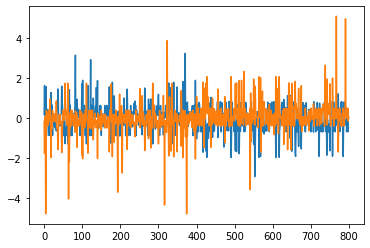

In [76]:
%matplotlib inline
dv = net.layerList[0].del_zee
plt.plot(dv)
plt.show()

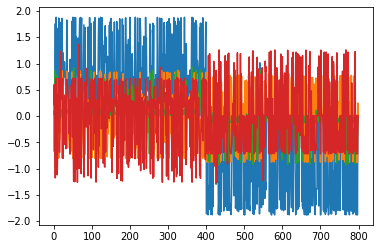

In [77]:
dv = net.layerList[1].del_output
plt.plot(dv)
plt.show()

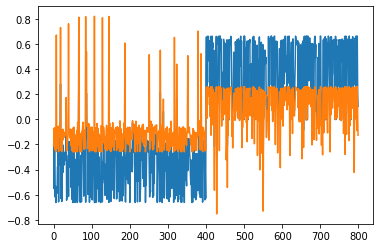

In [78]:
dv = net.layerList[2].del_output
plt.plot(dv)
plt.show()

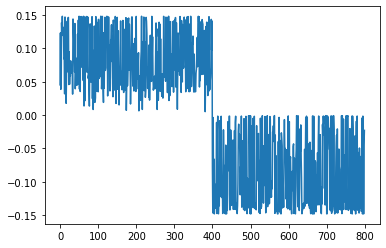

In [79]:
dv = net.layerList[3].del_output
plt.plot(dv)
plt.show()

In [60]:
# for i,l in enumerate(net.layerList):
#     try:
#         print(i)
#         if isinstance(l, tnn.LinearLayer):
#             dv = l.del_zee.std(axis=1)
#         elif isinstance(l, tnn.DoubleReluLinearLayer):
#             dv = l.del_output.std(axis=1)
        
#         plt.plot(dv)
#         plt.show()

#     except:
#         pass

In [61]:
def valuefunc1(l):
    if isinstance(l, tnn.LinearLayer):
        dzv = l.del_zee.std(axis=0)
        zv = l.zee.std(axis=0)
        return (dzv/zv).max() 
    elif isinstance(l, tnn.DoubleReluLinearLayer):
        dov = l.del_output.std(axis=0)
        ov = l.output.std(axis=0)
        return (dov/ov).max()
    return 0

def valuefunc2(l):
    if isinstance(l, tnn.LinearLayer):
        dzv = l.del_zee.std(axis=0)
        return dzv.mean() 
    elif isinstance(l, tnn.DoubleReluLinearLayer):
        dov = l.del_output.std(axis=0)
        return dov.mean()
    return 0

valuefunc = valuefunc2

In [62]:
# print(layer1.del_zee.var(axis=0).max())
# print(layer2.del_zee.var(axis=0).max())
# print(layer4.del_zee.var(axis=0).max())
for l in net.layerList:
    try:
        if isinstance(l, tnn.LinearLayer):
            print(l.del_zee.var(axis=0).max(), np.abs(l.del_zee).mean(axis=0).max())
        elif isinstance(l, tnn.DoubleReluLinearLayer):
            print(l.del_output.var(axis=0).max(), np.abs(l.del_output).mean(axis=0).max())

    except:
        pass

0.11511933059171497 0.1863710286900538
0.393573326575819 0.49133685288758455
0.05115506041613659 0.21352041371975858
0.011894524365683928 0.10296002550105268


In [63]:
# print(layer1.del_zee.mean(axis=0))
# print(layer2.del_zee.mean(axis=0))
# print(layer4.del_zee.mean(axis=0))
for l in net.layerList:
    try:
        if isinstance(l, tnn.LinearLayer):
            print(l.del_zee.mean(axis=0))
        elif isinstance(l, tnn.DoubleReluLinearLayer):
            print(l.del_output.mean(axis=0))
    except:
        pass

[-0.00189356 -0.00041215]
[-0.00184335  0.00024398 -0.00290633]
[0.00039409 0.00033245]
[-0.00019003]


In [64]:
# print(layer1.del_zee.mean(axis=0).max())
# print(layer2.del_zee.mean(axis=0).max())
# print(layer4.del_zee.mean(axis=0).max())
for l in net.layerList:
    try:
        if isinstance(l, tnn.LinearLayer):
            print(l.del_zee.mean(axis=0).max())
        elif isinstance(l, tnn.DoubleReluLinearLayer):
            print(l.del_output.mean(axis=0).max())
    except:
        pass

-0.0004121511834400888
0.00024398332312033504
0.00039408748475753386
-0.00019002987477127143


In [65]:
# layer2.weights

In [66]:
def add_neuron(layer:tnn.LinearLayer, next_layer:tnn.DoubleReluLinearLayer, optimizer, new_neurons=1):
#     l1 = deepcopy(layer1)
#     l2 = deepcopy(layer2)
    if isinstance(layer, tnn.LinearLayer):
        input_dim = layer.weights.shape[0]
        l1_add = tnn.LinearLayer(input_dim, new_neurons, optimizer=optimizer)
        
    elif isinstance(layer, tnn.DoubleReluLinearLayer):
        input_dim = layer.weights.shape[0]//2
        l1_add = tnn.DoubleReluLinearLayer(input_dim, new_neurons, optimizer=optimizer)
        
    else:
        print("Neuron adding functionality not added to the given layer")
        return
    
    new_w1 = np.hstack([layer.weights, l1_add.weights])
    new_b1 = np.hstack([layer.bias, l1_add.bias])
    
    i, o = next_layer.weights.shape
    new_w2_ = np.concatenate([next_layer.weights.reshape(2,i//2,o),
                              np.zeros(shape=(2,new_neurons,o))],
                             axis=1)
    new_w2 = new_w2_.reshape(-1, o)
    new_b2 = next_layer.bias
    
    if isinstance(layer, tnn.LinearLayer):
        _l1_ = tnn.LinearLayer(0,0,
                               weights=copy.deepcopy(new_w1),
                               bias=copy.deepcopy(new_b1),
                               optimizer=optimizer,
                              )
    else:
        _l1_ = tnn.DoubleReluLinearLayer(0,0,
                               weights=copy.deepcopy(new_w1),
                               bias=copy.deepcopy(new_b1),
                               optimizer=optimizer,
                              )
    _l2_ = tnn.DoubleReluLinearLayer(0,0,
                           weights=copy.deepcopy(new_w2),
                           bias=copy.deepcopy(new_b2),
                           optimizer=optimizer,
                          )
    return _l1_, _l2_

In [67]:
def add_neuron_in_maximum_variance(layer_list):
    indx_1 = 0
    indx_2 = indx_1+1
    
    max_var = 0
    ll = layer_list
    if isinstance(ll[-1], tnn.Sigmoid) or isinstance(ll[-1], tnn.Softmax):
        ll = ll[:-1]
    for i, l in enumerate(ll[:-1]):
        mv = valuefunc(l)
        print(i, mv)
        print(valuefunc1(l), valuefunc2(l))
        if max_var < mv:
            indx_1 = i
            indx_2 = i+1
            max_var = mv
    
    la1, la2 = add_neuron(layer_list[indx_1], layer_list[indx_2], optimizer=tnn.Adam())
    new_layers = layer_list
    new_layers[indx_1] = la1
    new_layers[indx_2] = la2
    
    return new_layers, indx_1

In [68]:
layers_backup = copy.deepcopy(net.layerList)

In [69]:
tnn.layerList = []
layers = copy.deepcopy(layers_backup)

In [70]:
layers

In [71]:
# la1, la2 = add_neuron(layers[1], layers[2], optimizer=tnn.Adam())
# new_layer_list = [layers[0], la1, la2,layers[3],layers[4]]
new_layer_list, i = add_neuron_in_maximum_variance(layers)
i

0 0.308657036271756
0.5200540683347943 0.308657036271756
1 0.31611186300950805
0.7712326620149389 0.31611186300950805
2 0.2084876108554505
1.2327162859753777 0.2084876108554505


1

In [72]:
new_layer_list[i].weights.shape, new_layer_list[i+1].weights.shape

((4, 4), (8, 2))

In [73]:
net = tnn.AutoForm(new_layers=True)
net.layerList = new_layer_list

In [74]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6408732491525021


100 Error =  0.603296464424966


200 Error =  0.5802878254096903


300 Error =  0.574046347418495


400 Error =  0.5713251002018263


500 Error =  0.5683675036215554


600 Error =  0.5675016352969474


700 Error =  0.5673834452010195


800 Error =  0.5670219035809386


900 Error =  0.5668792015857443


1000 Error =  0.566725601158705


1100 Error =  0.5664077385634517


1200 Error =  0.5659732328111923


TclError: invalid command name "pyimage117"

In [ ]:
print(net.layerList[0].weights.shape)
print(net.layerList[1].weights.shape)
print(net.layerList[2].weights.shape)
print(net.layerList[3].weights.shape)

h0 = net.layerList[0].weights.shape[1]
h1 = net.layerList[1].weights.shape[1]
h2 = net.layerList[2].weights.shape[1]
h3 = net.layerList[3].weights.shape[1]

### Training from scratch

In [ ]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, h0, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(h0, h1, optimizer=optimizer)
layer3 = tnn.DoubleReluLinearLayer(h1, h2, optimizer=optimizer)
layer4 = tnn.DoubleReluLinearLayer(h2, h3, optimizer=optimizer)
sigmoid = tnn.Sigmoid()

In [ ]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break